# Modelos poblacionales: exponencial y logístico

## 1. Motivación

> Si una población crece un x% por periodo, ¿qué pasa a largo plazo?

**Idea clave.** Si en cada periodo la población crece el **mismo porcentaje** $r$ (por ejemplo, $r=0.1$ es 10%), entonces el tamaño poblacional $N_t$ obedece la **ecuación en diferencias**:

$$
N_{t+1} = (1+r)\,N_t.
$$

**Interpretación**: $r$ es el **crecimiento per cápita por periodo** (constante). Si $r=0.1$, cada periodo la población aumenta un 10% respecto al tamaño del periodo anterior.

**Solución cerrada.** Despejando iterativamente,
$$
N_t = N_0(1+r)^t.
$$

- Si $r>0$: crecimiento exponencial (sube “cada vez más rápido”).
- Si $r=0$: población constante.
- Si $-1<r<0$: decrece (porcentaje negativo).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Utilidad visual simple
def _nice_axes(xlabel="", ylabel="", title=""):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

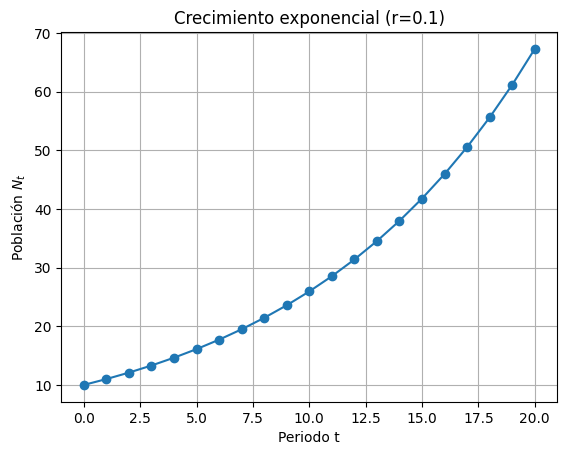

In [5]:
# --- Modelo exponencial: simulación y ejemplo ---

def exp_difference(N0: float, r: float, T: int = 20):
    """Devuelve tiempos y trayectoria de N_t para el modelo exponencial.
    N_{t+1} = (1+r) N_t
    """
    t = np.arange(T+1, dtype=int)
    N = np.zeros(T+1, dtype=float)
    N[0] = N0
    for i in range(T):
        N[i+1] = (1+r)*N[i]
    return t, N

# Ejemplo rápido
N0, r, T = 10.0, 0.1, 20
t, N = exp_difference(N0, r, T)

plt.figure()
plt.plot(t, N, marker="o")
_nice_axes("Periodo t", "Población $N_t$", "Crecimiento exponencial (r=0.1)")
plt.show()


## Del exponencial al logístico: la idea de **restricción**

En la vida real, el crecimiento **per cápita** no puede ser constante para siempre: hay recursos finitos. Introducimos la **capacidad de carga** $K$: el tamaño máximo que el ambiente puede sostener a largo plazo.

**Idea clave.** Hagamos que el crecimiento per cápita **disminuya linealmente** con $N_t$:
- Cuando $N_t=0$, queremos crecimiento per cápita máximo ($=r$).
- Cuando $N_t=K$, queremos crecimiento per cápita nulo (ya no hay espacio para crecer).

La recta más simple que cumple esto es:
$$
\text{crecimiento per cápita} = r\left(1 - \frac{N_t}{K}\right).
$$

Así, el **incremento total** en un paso es
$$
\Delta N_t = \underbrace{r\left(1 - \frac{N_t}{K}\right)}_{\text{per cápita}}\times \underbrace{N_t}_{\text{número de individuos}}.
$$

Y el **modelo logístico discreto (de Verhulst)** queda:
$$
N_{t+1} = N_t + r\,N_t\left(1-\frac{N_t}{K}\right).
$$

> Si definimos $x_t = N_t/K$ (población *normalizada* en $[0,1]$), entonces
$$
x_{t+1} = x_t + r\,x_t(1-x_t) \equiv f_r(x_t).
$$

**Intuición.** Para $x_t$ pequeño, la corrección $r\,x_t(1-x_t)$ es positiva y la población sube. Cuando $x_t$ se acerca a 1 ($N_t$ cerca de $K$), el término $(1-x_t)$ se hace pequeño y el crecimiento se frena.


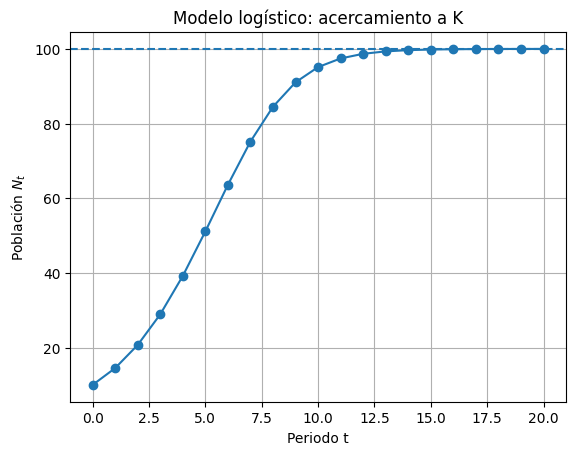

In [9]:
# --- Modelo logístico (Verhulst discreto): simulación y ejemplo ---

def logistic_step(N: float, r: float, K: float) -> float:
    """Un paso del modelo logístico: N_{t+1} = N_t + r N_t (1 - N_t/K)."""
    return N + r*N*(1 - N/K)

def logistic_trajectory(N0: float, r: float, K: float, T: int = 50):
    t = np.arange(T+1, dtype=int)
    N = np.zeros(T+1, dtype=float)
    N[0] = N0
    for i in range(T):
        N[i+1] = logistic_step(N[i], r, K)
    return t, N

# Ejemplo
N0, r, K, T = 10.0, 0.5, 100.0, 20
t, N = logistic_trajectory(N0, r, K, T)

plt.figure()
plt.plot(t, N, marker="o")
_nice_axes("Periodo t", "Población $N_t$", "Modelo logístico: acercamiento a K")
plt.axhline(K, linestyle="--")
plt.show()


## Diagrama telaraña (cobweb)

Para una ecuación en diferencias $x_{t+1} = f(x_t)$, el **diagrama telaraña** ayuda a “ver” la iteración:

1. Dibujamos $y=f(x)$ y la recta identidad $y=x$.
2. Partimos de $x_0$ en el eje horizontal.
3. Subimos **vertical** hasta la curva $y=f(x)$: ese punto tiene altura $x_1 = f(x_0)$.
4. Vamos **horizontal** hasta la recta $y=x$ (que “copia” el valor al eje x).
5. Repetimos (vertical a $y=f(x)$, horizontal a $y=x$) para ver $x_2, x_3, \ldots$.

**Regla de estabilidad.** Un punto fijo $x^*$ cumple $f(x^*)=x^*$. Si cerca de $x^*$ la curva $f$ es menos inclinada que la recta $y=x$ (pendiente en valor absoluto **menor que 1**), las iteraciones se acercan a $x^*$.

Para el logístico normalizado $f_r(x)=x + r\,x(1-x)$:
- Puntos fijos: $x=0$ y $x=1$.
- Derivada: $f'_r(x)=1 + r - 2r x$.
  - En $x=0$: $f'_r(0)=1+r>1$ si $r>0$ → **inestable**.
  - En $x=1$: $f'_r(1)=1-r$. Es **estable** si $|1-r|<1$, es decir, $0<r<2$.

> Traducción: para $0<r<2$ la población tiende a $K$; si $r$ crece demasiado, aparecen **oscilaciones** y puede no estabilizar.


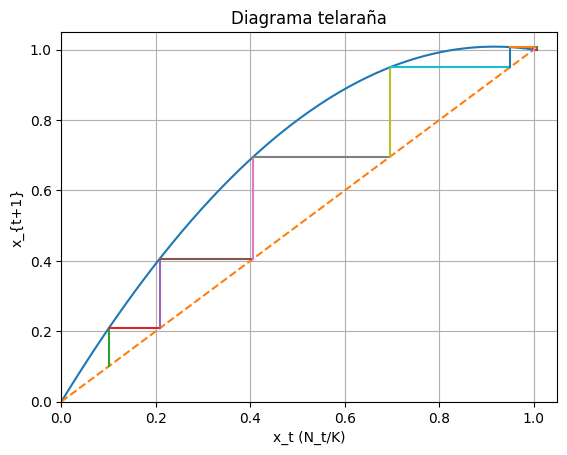

In [13]:
# --- Cobweb para f(x) = x + r x (1-x) en x in [0,1] ---

def f_logistico_normalizado(x: float, r: float) -> float:
    return x + r*x*(1 - x)

def cobweb(f, x0: float, n_iter: int, xmin=0.0, xmax=1.0):
    xs = np.linspace(xmin, xmax, 400)
    ys = f(xs)

    plt.figure()
    # Curva y=f(x) y recta identidad
    plt.plot(xs, ys)
    plt.plot(xs, xs, linestyle="--")

    # Trayectoria telaraña
    x, y = x0, f(x0)
    for _ in range(n_iter):
        # vertical: (x, x) -> (x, f(x))
        plt.plot([x, x], [x, y])
        # horizontal: (x, f(x)) -> (f(x), f(x))
        plt.plot([x, y], [y, y])
        x, y = y, f(y)

    _nice_axes("x_t (N_t/K)", "x_{t+1}", "Diagrama telaraña")
    plt.xlim(xmin, xmax+0.05)
    plt.ylim(xmin, xmax+0.05)
    plt.show()

# Ejemplo simple
r = 1.2
x0 = 0.1
n_iter = 25
cobweb(lambda x: f_logistico_normalizado(x, r), x0, n_iter)


In [ ]:
# --- Versión interactiva con slider de iteraciones ---
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, FloatSlider, fixed

def cobweb_interactivo(r=1.2, x0=0.1, n_iter=25):
    f = lambda x: f_logistico_normalizado(x, r)
    cobweb(f, x0, n_iter)

interact(
    cobweb_interactivo,
    r=FloatSlider(min=0.0, max=2.5, step=0.01, value=1.2, description="r"),
    x0=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.1, description="x0=N0/K"),
    n_iter=IntSlider(min=1, max=100, step=1, value=25, description="# iter")
)


interactive(children=(FloatSlider(value=1.2, description='r', max=2.5, step=0.01), FloatSlider(value=0.1, desc…

<function __main__.cobweb_interactivo(r=1.2, x0=0.1, n_iter=25)>